In [6]:
pip install -r requirements.txt

ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install numpy==1.26.4

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.7/13.7 MB 4.3 MB/s  0:00:03 eta 0:00:01
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.6
    Uninstalling numpy-2.2.6:
      Successfully uninstalled numpy-2.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install pyradiomics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 6.7 MB/s  0:00:05m0:00:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
Discarding https://files.pythonhosted.org/packages/03/c1/20fc2c50ab1e3304da36d866042a1905a2b05a1431ece35448ab6b4578f2/pyradiomics-3.1.0.tar.gz (from https://pypi.org/simple/pyradiomics/): Requested pyradiomics from https://files.pythonhosted.org/packages/03/c1/20fc2c50ab1e3304da36d866042a1905a2b05a1431ece35448ab6b4578f2/pyradiomics-3.1.0.tar.gz has inconsistent version: expected '3.1.0', but metadata has '3.0.1a1'
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 13.1 MB/s  0:00:02 eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [20 lines of output]
      Traceback (most recen

In [7]:
print(plt.style.available)

NameError: name 'plt' is not defined


# 01_data_exploration.ipynb
# Exploratory Data Analysis for LUNA16 Dataset


## Setup and Imports



In [9]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import SimpleITK as sitk
from pathlib import Path

# Add src to path
sys.path.append('../src')

# Set style
plt.style.use('seaborn-v0_8-deep')
sns.set_palette("husl")

print("✓ Imports successful")

✓ Imports successful


## Load Annotations

In [11]:
# Load annotations
annotations_file = '../data/annotations/annotations.csv'
annotations = pd.read_csv(annotations_file)

print("="*60)
print("LUNA16 DATASET OVERVIEW")
print("="*60)
print(f"\nTotal annotations: {len(annotations)}")
print(f"Unique patients: {annotations['seriesuid'].nunique()}")
print(f"\nColumns: {list(annotations.columns)}")

# Display first few rows
print("\nFirst 10 annotations:")
annotations.head(10)

LUNA16 DATASET OVERVIEW

Total annotations: 1186
Unique patients: 601

Columns: ['seriesuid', 'coordX', 'coordY', 'coordZ', 'diameter_mm']

First 10 annotations:


,seriesuid,coordX,coordY,coordZ,diameter_mm
0,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,-128.699421,-175.319272,-298.387506,5.651471
1,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,103.783651,-211.925149,-227.121250,4.224708
2,1.3.6.1.4.1.14519.5.2.1.6279.6001.100398138793...,69.639017,-140.944586,876.374496,5.786348
3,1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016...,-24.013824,192.102405,-391.081276,8.143262
4,1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016...,2.441547,172.464881,-405.493732,18.545150
5,1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016...,90.931713,149.027266,-426.544715,18.208570
6,1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016...,89.540769,196.405159,-515.073322,16.381276
7,1.3.6.1.4.1.14519.5.2.1.6279.6001.100953483028...,81.509646,54.957219,-150.346423,10.362321
8,1.3.6.1.4.1.14519.5.2.1.6279.6001.102681962408...,105.055792,19.825260,-91.247251,21.089619
9,1.3.6.1.4.1.14519.5.2.1.6279.6001.104562737760...,-124.834262,127.247155,-473.064479,10.465854


## Dataset Statistics

In [12]:
print("\n" + "="*60)
print("DATASET STATISTICS")
print("="*60)

# Basic statistics
print("\nNodule Coordinates (mm):")
print(annotations[['coordX', 'coordY', 'coordZ']].describe())

if 'diameter_mm' in annotations.columns:
    print("\nNodule Diameter Statistics:")
    print(annotations['diameter_mm'].describe())
    
    print(f"\nDiameter range: {annotations['diameter_mm'].min():.2f} - {annotations['diameter_mm'].max():.2f} mm")
    print(f"Mean diameter: {annotations['diameter_mm'].mean():.2f} mm")
    print(f"Median diameter: {annotations['diameter_mm'].median():.2f} mm")

# Nodules per patient
nodules_per_patient = annotations.groupby('seriesuid').size()
print(f"\nNodules per patient:")
print(f"  Mean: {nodules_per_patient.mean():.2f}")
print(f"  Median: {nodules_per_patient.median():.0f}")
print(f"  Max: {nodules_per_patient.max()}")
print(f"  Min: {nodules_per_patient.min()}")


DATASET STATISTICS

Nodule Coordinates (mm):
            coordX       coordY       coordZ
count  1186.000000  1186.000000  1186.000000
mean     -5.067547     8.428113  -160.159029
std      84.468115    98.316003   279.829437
min    -164.351031  -283.834336  -790.074799
25%     -80.909225   -51.549643  -221.197808
50%     -32.855132    18.787926  -167.615160
75%      76.830069    67.245915  -109.735281
max     164.763985   271.405521  1790.494057

Nodule Diameter Statistics:
count    1186.000000
mean        8.306527
std         4.762033
min         3.253443
25%         5.107177
50%         6.433600
75%         9.696301
max        32.270030
Name: diameter_mm, dtype: float64

Diameter range: 3.25 - 32.27 mm
Mean diameter: 8.31 mm
Median diameter: 6.43 mm

Nodules per patient:
  Mean: 1.97
  Median: 1
  Max: 12
  Min: 1


## Visualize Nodule Size Distribution

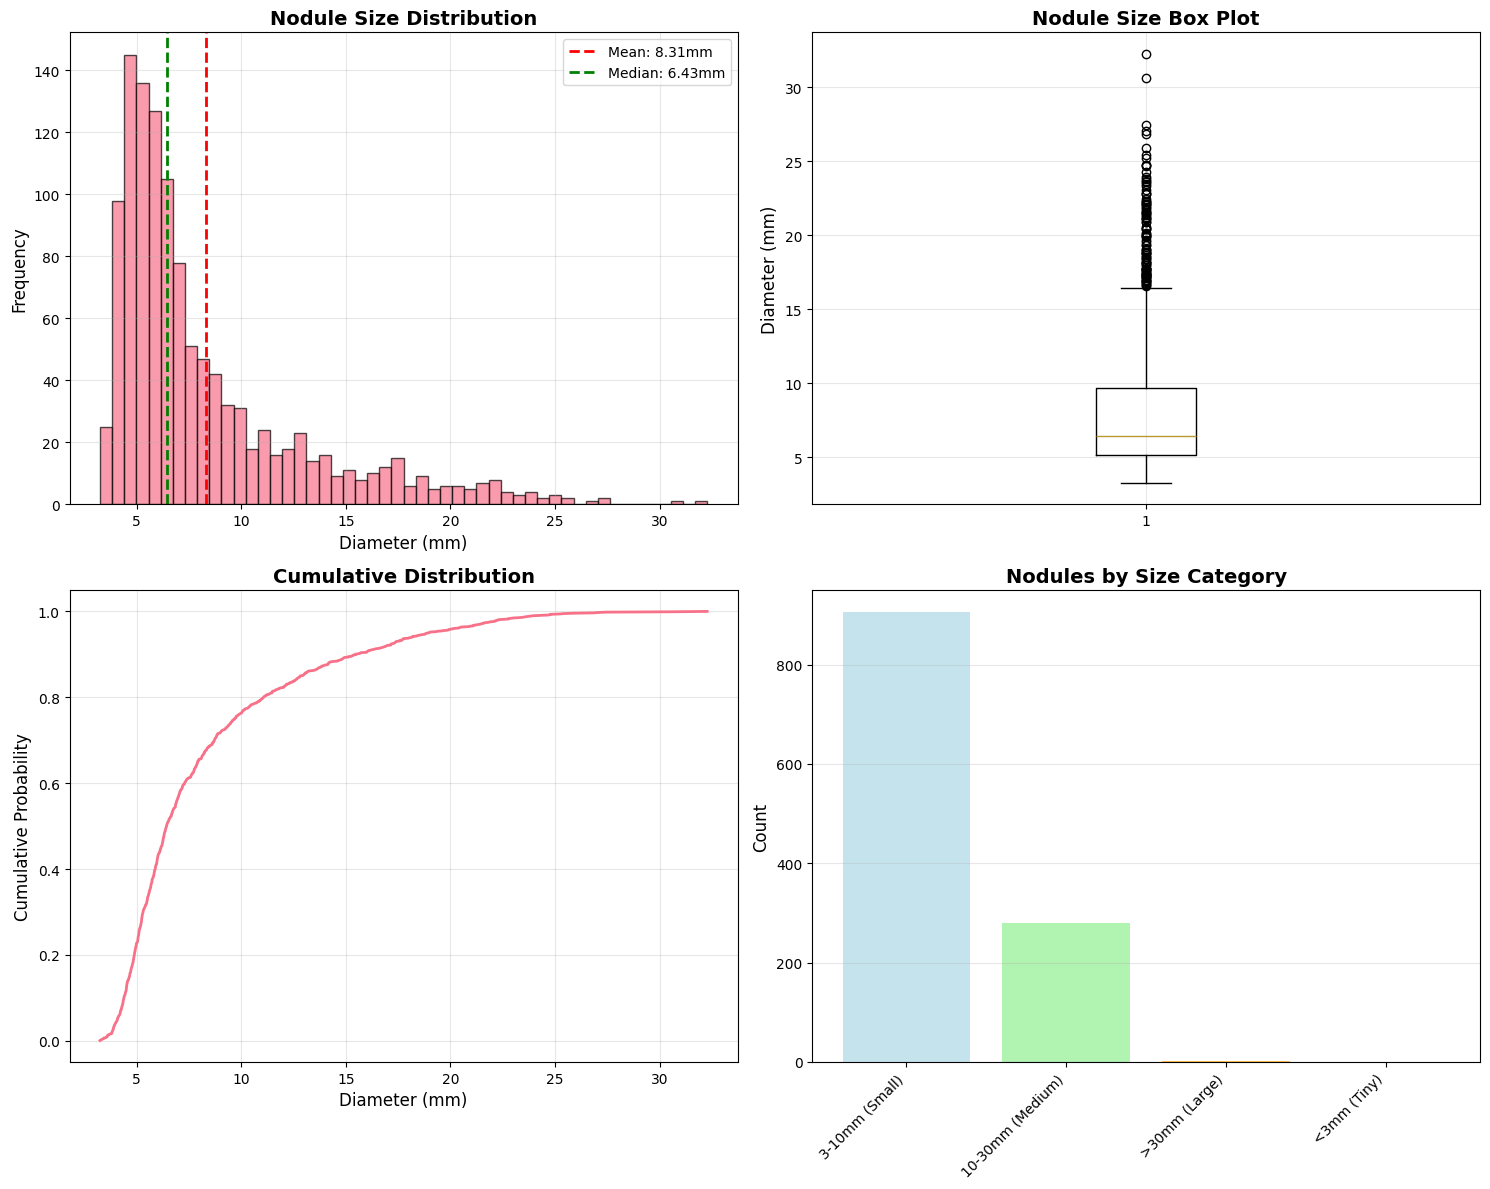

In [13]:
if 'diameter_mm' in annotations.columns:
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    # Histogram
    axes[0, 0].hist(annotations['diameter_mm'], bins=50, edgecolor='black', alpha=0.7)
    axes[0, 0].axvline(annotations['diameter_mm'].mean(), color='red', 
                       linestyle='--', linewidth=2, label=f'Mean: {annotations["diameter_mm"].mean():.2f}mm')
    axes[0, 0].axvline(annotations['diameter_mm'].median(), color='green', 
                       linestyle='--', linewidth=2, label=f'Median: {annotations["diameter_mm"].median():.2f}mm')
    axes[0, 0].set_xlabel('Diameter (mm)', fontsize=12)
    axes[0, 0].set_ylabel('Frequency', fontsize=12)
    axes[0, 0].set_title('Nodule Size Distribution', fontsize=14, fontweight='bold')
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)
    
    # Box plot
    axes[0, 1].boxplot(annotations['diameter_mm'], vert=True)
    axes[0, 1].set_ylabel('Diameter (mm)', fontsize=12)
    axes[0, 1].set_title('Nodule Size Box Plot', fontsize=14, fontweight='bold')
    axes[0, 1].grid(True, alpha=0.3)
    
    # Cumulative distribution
    sorted_diameters = np.sort(annotations['diameter_mm'])
    cumulative = np.arange(1, len(sorted_diameters) + 1) / len(sorted_diameters)
    axes[1, 0].plot(sorted_diameters, cumulative, linewidth=2)
    axes[1, 0].set_xlabel('Diameter (mm)', fontsize=12)
    axes[1, 0].set_ylabel('Cumulative Probability', fontsize=12)
    axes[1, 0].set_title('Cumulative Distribution', fontsize=14, fontweight='bold')
    axes[1, 0].grid(True, alpha=0.3)
    
    # Size categories
    size_bins = [0, 3, 10, 30, float('inf')]
    size_labels = ['<3mm (Tiny)', '3-10mm (Small)', '10-30mm (Medium)', '>30mm (Large)']
    annotations['size_category'] = pd.cut(annotations['diameter_mm'], 
                                          bins=size_bins, labels=size_labels)
    size_counts = annotations['size_category'].value_counts()
    
    axes[1, 1].bar(range(len(size_counts)), size_counts.values, 
                   color=['lightblue', 'lightgreen', 'orange', 'red'], alpha=0.7)
    axes[1, 1].set_xticks(range(len(size_counts)))
    axes[1, 1].set_xticklabels(size_counts.index, rotation=45, ha='right')
    axes[1, 1].set_ylabel('Count', fontsize=12)
    axes[1, 1].set_title('Nodules by Size Category', fontsize=14, fontweight='bold')
    axes[1, 1].grid(True, alpha=0.3, axis='y')
    
    plt.tight_layout()
    plt.savefig('../results/nodule_size_distribution.png', dpi=150, bbox_inches='tight')
    plt.show()


## Malignancy Distribution (if available)

In [14]:
if 'malignancy' in annotations.columns:
    print("\n" + "="*60)
    print("MALIGNANCY ANALYSIS")
    print("="*60)
    
    malignancy_counts = annotations['malignancy'].value_counts().sort_index()
    print("\nMalignancy distribution:")
    print(malignancy_counts)
    
    # Visualize
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    
    # Bar plot
    malignancy_counts.plot(kind='bar', ax=axes[0], color='skyblue', edgecolor='black', alpha=0.7)
    axes[0].set_xlabel('Malignancy Score', fontsize=12)
    axes[0].set_ylabel('Count', fontsize=12)
    axes[0].set_title('Malignancy Distribution', fontsize=14, fontweight='bold')
    axes[0].grid(True, alpha=0.3, axis='y')
    
    # Pie chart
    colors = ['lightgreen', 'yellow', 'orange', 'red', 'darkred']
    axes[1].pie(malignancy_counts.values, labels=malignancy_counts.index, 
                autopct='%1.1f%%', startangle=90, colors=colors[:len(malignancy_counts)])
    axes[1].set_title('Malignancy Proportions', fontsize=14, fontweight='bold')
    
    plt.tight_layout()
    plt.savefig('../results/malignancy_distribution.png', dpi=150, bbox_inches='tight')
    plt.show()
    
    # Binary classification (benign vs malignant)
    annotations['is_malignant'] = (annotations['malignancy'] >= 3).astype(int)
    benign_count = (annotations['is_malignant'] == 0).sum()
    malignant_count = (annotations['is_malignant'] == 1).sum()
    
    print(f"\nBinary classification:")
    print(f"  Benign (score < 3): {benign_count} ({benign_count/len(annotations)*100:.1f}%)")
    print(f"  Malignant (score >= 3): {malignant_count} ({malignant_count/len(annotations)*100:.1f}%)")

## Nodules per Patient Analysis


NODULES PER PATIENT

Top 10 patients with most nodules:
seriesuid
1.3.6.1.4.1.14519.5.2.1.6279.6001.176030616406569931557298712518    12
1.3.6.1.4.1.14519.5.2.1.6279.6001.328789598898469177563438457842     9
1.3.6.1.4.1.14519.5.2.1.6279.6001.195557219224169985110295082004     9
1.3.6.1.4.1.14519.5.2.1.6279.6001.202187810895588720702176009630     9
1.3.6.1.4.1.14519.5.2.1.6279.6001.219428004988664846407984058588     9
1.3.6.1.4.1.14519.5.2.1.6279.6001.239358021703233250639913775427     8
1.3.6.1.4.1.14519.5.2.1.6279.6001.112767175295249119452142211437     8
1.3.6.1.4.1.14519.5.2.1.6279.6001.309955999522338651429118207446     7
1.3.6.1.4.1.14519.5.2.1.6279.6001.910435939545691201820711078950     7
1.3.6.1.4.1.14519.5.2.1.6279.6001.280072876841890439628529365478     7
dtype: int64


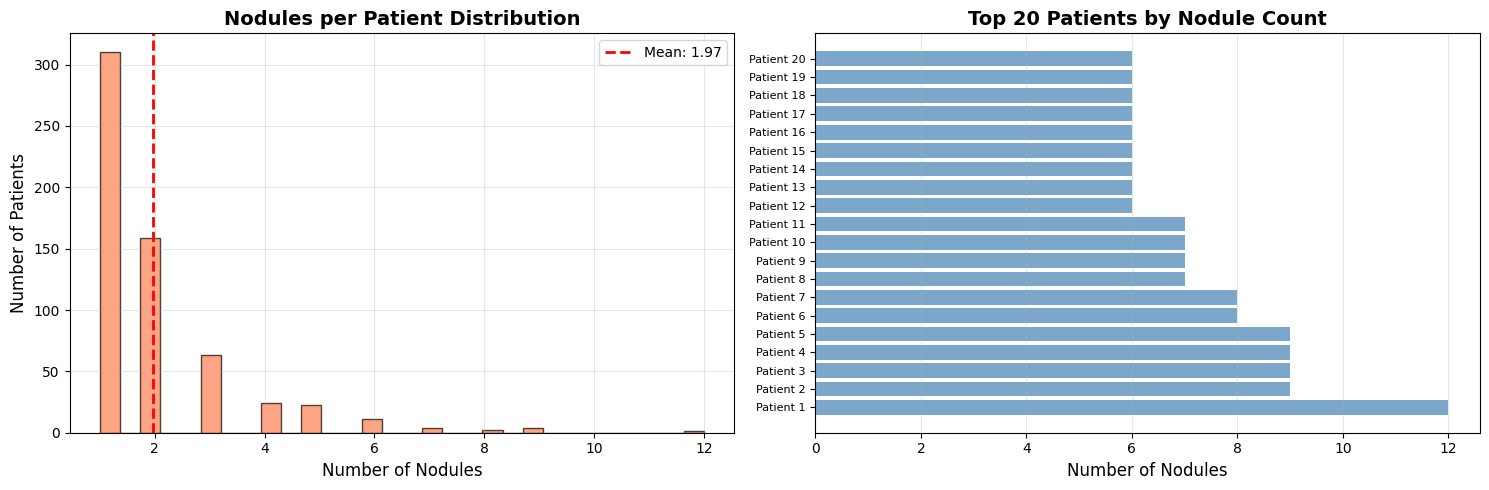

In [15]:
print("\n" + "="*60)
print("NODULES PER PATIENT")
print("="*60)

nodules_per_patient = annotations.groupby('seriesuid').size().sort_values(ascending=False)

print(f"\nTop 10 patients with most nodules:")
print(nodules_per_patient.head(10))

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Distribution
axes[0].hist(nodules_per_patient.values, bins=30, edgecolor='black', alpha=0.7, color='coral')
axes[0].set_xlabel('Number of Nodules', fontsize=12)
axes[0].set_ylabel('Number of Patients', fontsize=12)
axes[0].set_title('Nodules per Patient Distribution', fontsize=14, fontweight='bold')
axes[0].axvline(nodules_per_patient.mean(), color='red', 
                linestyle='--', linewidth=2, label=f'Mean: {nodules_per_patient.mean():.2f}')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Top 20 patients
top_20 = nodules_per_patient.head(20)
axes[1].barh(range(len(top_20)), top_20.values, color='steelblue', alpha=0.7)
axes[1].set_yticks(range(len(top_20)))
axes[1].set_yticklabels([f'Patient {i+1}' for i in range(len(top_20))], fontsize=8)
axes[1].set_xlabel('Number of Nodules', fontsize=12)
axes[1].set_title('Top 20 Patients by Nodule Count', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.savefig('../results/nodules_per_patient.png', dpi=150, bbox_inches='tight')
plt.show()

## Spatial Distribution of Nodules


SPATIAL DISTRIBUTION


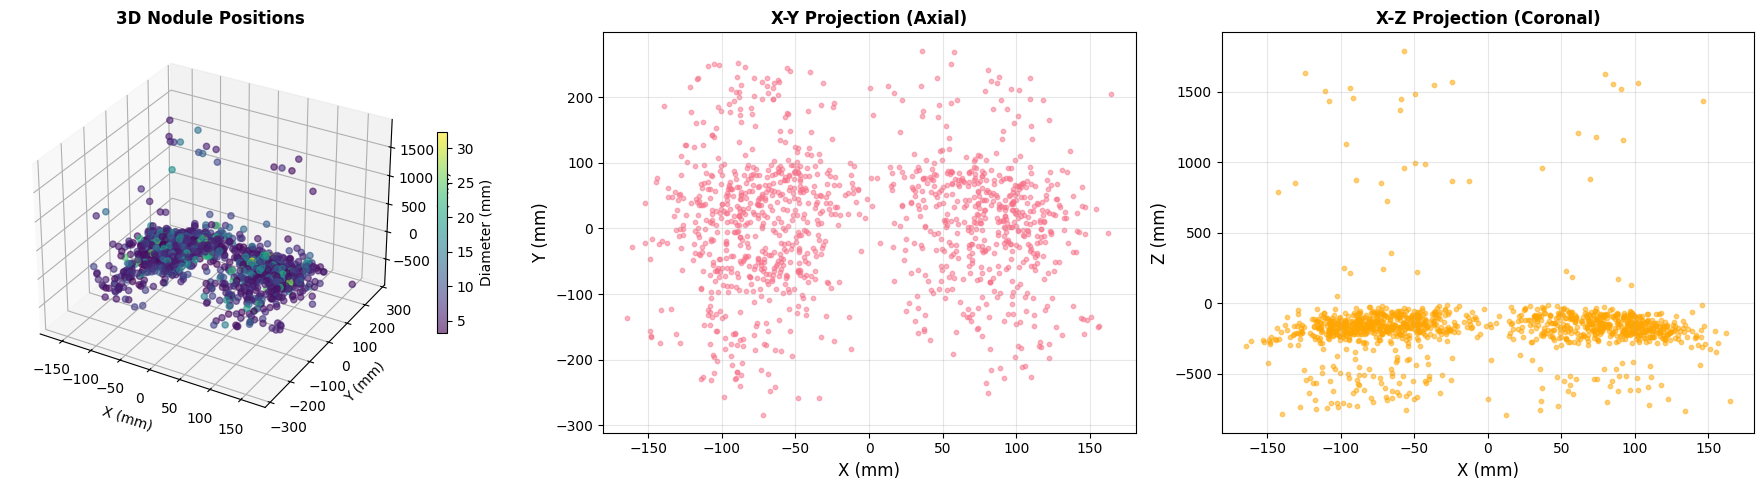

In [16]:
print("\n" + "="*60)
print("SPATIAL DISTRIBUTION")
print("="*60)

fig = plt.figure(figsize=(18, 5))

# 3D scatter plot
ax1 = fig.add_subplot(131, projection='3d')
scatter = ax1.scatter(annotations['coordX'], annotations['coordY'], annotations['coordZ'],
                     c=annotations['diameter_mm'] if 'diameter_mm' in annotations.columns else 'blue',
                     cmap='viridis', alpha=0.6, s=20)
ax1.set_xlabel('X (mm)', fontsize=10)
ax1.set_ylabel('Y (mm)', fontsize=10)
ax1.set_zlabel('Z (mm)', fontsize=10)
ax1.set_title('3D Nodule Positions', fontsize=12, fontweight='bold')
if 'diameter_mm' in annotations.columns:
    plt.colorbar(scatter, ax=ax1, label='Diameter (mm)', shrink=0.5)

# X-Y projection
ax2 = fig.add_subplot(132)
ax2.scatter(annotations['coordX'], annotations['coordY'], alpha=0.5, s=10)
ax2.set_xlabel('X (mm)', fontsize=12)
ax2.set_ylabel('Y (mm)', fontsize=12)
ax2.set_title('X-Y Projection (Axial)', fontsize=12, fontweight='bold')
ax2.grid(True, alpha=0.3)

# X-Z projection
ax3 = fig.add_subplot(133)
ax3.scatter(annotations['coordX'], annotations['coordZ'], alpha=0.5, s=10, color='orange')
ax3.set_xlabel('X (mm)', fontsize=12)
ax3.set_ylabel('Z (mm)', fontsize=12)
ax3.set_title('X-Z Projection (Coronal)', fontsize=12, fontweight='bold')
ax3.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../results/spatial_distribution.png', dpi=150, bbox_inches='tight')
plt.show()


## Load and Visualize Sample CT Scan

In [17]:
print("\n" + "="*60)
print("SAMPLE CT SCAN VISUALIZATION")
print("="*60)

# Get first patient
sample_uid = annotations['seriesuid'].iloc[0]
print(f"\nLoading scan: {sample_uid}")

# Find the .mhd file
data_dir = Path('../data/raw')
mhd_file = None
for subset_dir in data_dir.glob('subset*'):
    potential_file = subset_dir / f"{sample_uid}.mhd"
    if potential_file.exists():
        mhd_file = potential_file
        break

if mhd_file and mhd_file.exists():
    # Load CT scan
    itk_image = sitk.ReadImage(str(mhd_file))
    image = sitk.GetArrayFromImage(itk_image)
    spacing = itk_image.GetSpacing()
    origin = itk_image.GetOrigin()
    
    print(f"✓ Loaded CT scan")
    print(f"  Shape: {image.shape}")
    print(f"  Spacing: {spacing}")
    print(f"  Origin: {origin}")
    print(f"  HU range: [{image.min()}, {image.max()}]")
    
    # Visualize multiple slices
    depth = image.shape[0]
    slice_indices = [depth//4, depth//2, 3*depth//4]
    
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    
    for idx, slice_idx in enumerate(slice_indices):
        # Axial view
        axes[0, idx].imshow(image[slice_idx], cmap='gray', vmin=-1000, vmax=400)
        axes[0, idx].set_title(f'Axial Slice {slice_idx}', fontsize=12, fontweight='bold')
        axes[0, idx].axis('off')
        
        # Mark nodules on this slice
        patient_nodules = annotations[annotations['seriesuid'] == sample_uid]
        for _, nodule in patient_nodules.iterrows():
            # Convert world coords to voxel coords (simplified)
            z_voxel = int((nodule['coordZ'] - origin[2]) / spacing[2])
            if abs(z_voxel - slice_idx) < 5:  # Within 5 slices
                y_voxel = int((nodule['coordY'] - origin[1]) / spacing[1])
                x_voxel = int((nodule['coordX'] - origin[0]) / spacing[0])
                axes[0, idx].plot(x_voxel, y_voxel, 'ro', markersize=10, 
                                 markerfacecolor='none', markeredgewidth=2)
        
        # Histogram
        axes[1, idx].hist(image[slice_idx].flatten(), bins=100, color='steelblue', alpha=0.7)
        axes[1, idx].set_xlabel('HU Value', fontsize=10)
        axes[1, idx].set_ylabel('Frequency', fontsize=10)
        axes[1, idx].set_title(f'HU Distribution - Slice {slice_idx}', fontsize=12, fontweight='bold')
        axes[1, idx].set_xlim(-1000, 400)
        axes[1, idx].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('../results/sample_ct_scan.png', dpi=150, bbox_inches='tight')
    plt.show()
else:
    print("⚠ Sample CT scan not found. Please check data directory.")


SAMPLE CT SCAN VISUALIZATION

Loading scan: 1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222365663678666836860
⚠ Sample CT scan not found. Please check data directory.


## Data Quality Checks

In [18]:
print("\n" + "="*60)
print("DATA QUALITY CHECKS")
print("="*60)

# Check for missing values
print("\nMissing values:")
print(annotations.isnull().sum())

# Check for duplicates
duplicates = annotations.duplicated().sum()
print(f"\nDuplicate rows: {duplicates}")

# Check coordinate ranges
print("\nCoordinate ranges:")
print(f"  X: [{annotations['coordX'].min():.2f}, {annotations['coordX'].max():.2f}]")
print(f"  Y: [{annotations['coordY'].min():.2f}, {annotations['coordY'].max():.2f}]")
print(f"  Z: [{annotations['coordZ'].min():.2f}, {annotations['coordZ'].max():.2f}]")

# Check for outliers in diameter
if 'diameter_mm' in annotations.columns:
    Q1 = annotations['diameter_mm'].quantile(0.25)
    Q3 = annotations['diameter_mm'].quantile(0.75)
    IQR = Q3 - Q1
    outliers = annotations[
        (annotations['diameter_mm'] < Q1 - 1.5 * IQR) | 
        (annotations['diameter_mm'] > Q3 + 1.5 * IQR)
    ]
    print(f"\nPotential outliers in diameter: {len(outliers)}")
    if len(outliers) > 0:
        print(f"  Range: {outliers['diameter_mm'].min():.2f} - {outliers['diameter_mm'].max():.2f} mm")


DATA QUALITY CHECKS

Missing values:
seriesuid        0
coordX           0
coordY           0
coordZ           0
diameter_mm      0
size_category    0
dtype: int64

Duplicate rows: 0

Coordinate ranges:
  X: [-164.35, 164.76]
  Y: [-283.83, 271.41]
  Z: [-790.07, 1790.49]

Potential outliers in diameter: 103
  Range: 16.60 - 32.27 mm


## Summary Report

In [19]:
print("\n" + "="*60)
print("EXPLORATION SUMMARY REPORT")
print("="*60)

summary = f"""
Dataset: LUNA16 Lung Nodule Detection

📊 Overview:
  - Total annotations: {len(annotations)}
  - Unique patients: {annotations['seriesuid'].nunique()}
  - Nodules per patient: {nodules_per_patient.mean():.2f} ± {nodules_per_patient.std():.2f}

📏 Nodule Characteristics:
"""

if 'diameter_mm' in annotations.columns:
    summary += f"""  - Mean diameter: {annotations['diameter_mm'].mean():.2f} mm
  - Diameter range: {annotations['diameter_mm'].min():.2f} - {annotations['diameter_mm'].max():.2f} mm
  - Size categories:
"""
    for cat, count in size_counts.items():
        summary += f"    • {cat}: {count} ({count/len(annotations)*100:.1f}%)\n"

if 'malignancy' in annotations.columns:
    summary += f"""
⚕️  Malignancy:
  - Benign: {benign_count} ({benign_count/len(annotations)*100:.1f}%)
  - Malignant: {malignant_count} ({malignant_count/len(annotations)*100:.1f}%)
"""

summary += f"""
✅ Data Quality:
  - Missing values: {annotations.isnull().sum().sum()}
  - Duplicate rows: {duplicates}
  - Outliers detected: {len(outliers) if 'diameter_mm' in annotations.columns else 'N/A'}

📁 Generated Visualizations:
  ✓ Nodule size distribution
  ✓ Malignancy distribution
  ✓ Nodules per patient analysis
  ✓ Spatial distribution (3D)
  ✓ Sample CT scan with annotations
"""

print(summary)

# Save summary
with open(r'C:\Users\Administrator\Downloads\lung_cancer_detection\results\exploration_summary.txt', 'w', encoding='utf-8') as f:
    f.write(summary)

print("\n✅ Data exploration complete!")
print("📊 All visualizations saved to '../results/'")


EXPLORATION SUMMARY REPORT

Dataset: LUNA16 Lung Nodule Detection

📊 Overview:
  - Total annotations: 1186
  - Unique patients: 601
  - Nodules per patient: 1.97 ± 1.48

📏 Nodule Characteristics:
  - Mean diameter: 8.31 mm
  - Diameter range: 3.25 - 32.27 mm
  - Size categories:
    • 3-10mm (Small): 905 (76.3%)
    • 10-30mm (Medium): 279 (23.5%)
    • >30mm (Large): 2 (0.2%)
    • <3mm (Tiny): 0 (0.0%)

✅ Data Quality:
  - Missing values: 0
  - Duplicate rows: 0
  - Outliers detected: 103

📁 Generated Visualizations:
  ✓ Nodule size distribution
  ✓ Malignancy distribution
  ✓ Nodules per patient analysis
  ✓ Spatial distribution (3D)
  ✓ Sample CT scan with annotations


✅ Data exploration complete!
📊 All visualizations saved to '../results/'
